In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
food_df=pd.read_csv("/content/synthetic_food_dataset_imbalanced.csv")
food_df

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9178,178.865144,8.497347,8.457762,25.771561,4.613203,1.649837,303.914397,18.426571,68.846281,44.090713,128.791298,lunch,grilled,False,True,Sushi
9179,325.848219,14.763603,25.490854,28.618117,6.060616,2.743457,681.347858,46.802118,62.876427,46.509836,193.174339,lunch,baked,False,False,Burger
9180,298.694890,17.099918,16.616228,36.038691,3.706309,2.560760,597.148023,23.686207,77.561511,45.357218,201.306064,breakfast,fried,False,False,Pizza
9181,342.053223,7.627456,8.433386,36.321920,2.506955,2.467520,13.667479,13.259509,70.815814,52.425795,152.396335,dinner,fried,False,False,Pasta


In [ ]:
##EXAMINE DATASET SIZE

In [ ]:
food_df.shape

(9183, 16)

In [ ]:
food_df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,9076.000000,9076.000000,9076.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000
mean,274.130516,9.514255,12.574795,29.029077,8.547740,1.894083,336.976225,26.894580,64.362342,48.647768,150.362214
std,110.109046,7.979428,8.347228,12.580153,7.947383,1.759507,317.835414,24.769099,25.211525,20.568931,51.848477
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.719862,62.471162
25%,211.961570,3.850595,8.423383,25.206204,3.763292,0.746969,64.280618,12.737052,60.109248,38.710082,108.171434
50%,283.026993,9.034002,11.661482,29.788163,5.517582,1.644563,293.184429,23.270968,68.573025,45.431299,151.738892
75%,329.061053,12.669358,15.887782,34.704312,14.453675,2.632058,632.677108,35.226147,75.539325,52.122405,189.029179
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [ ]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9183 entries, 0 to 9182
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            9076 non-null   float64
 1   Protein             9076 non-null   float64
 2   Fat                 9076 non-null   float64
 3   Carbs               9075 non-null   float64
 4   Sugar               9075 non-null   float64
 5   Fiber               9075 non-null   float64
 6   Sodium              9075 non-null   float64
 7   Cholesterol         9075 non-null   float64
 8   Glycemic_Index      9075 non-null   float64
 9   Water_Content       9075 non-null   float64
 10  Serving_Size        9075 non-null   float64
 11  Meal_Type           9182 non-null   object 
 12  Preparation_Method  9182 non-null   object 
 13  Is_Vegan            9182 non-null   object 
 14  Is_Gluten_Free      9182 non-null   object 
 15  Food_Name           9182 non-null   object 
dtypes: flo

In [ ]:
food_df.isnull().sum()

,0
Calories,107
Protein,107
Fat,107
Carbs,108
Sugar,108
Fiber,108
Sodium,108
Cholesterol,108
Glycemic_Index,108
Water_Content,108


In [ ]:
food_df['Calories'].value_counts(dropna=False)

,count
Calories,
NaN,107
1289.956763,42
112.387290,1
283.641336,1
404.695195,1
...,...
331.892854,1
210.739356,1
212.137269,1


<Axes: ylabel='Frequency'>

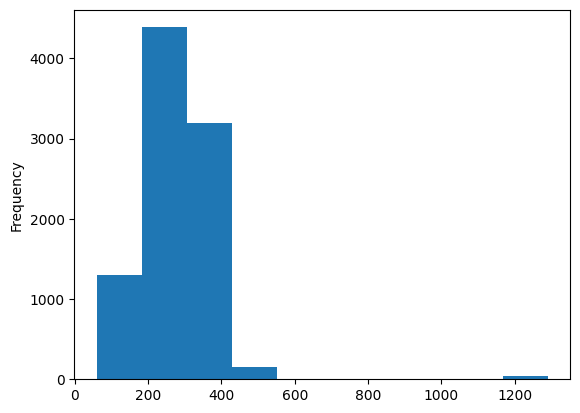

In [ ]:
food_df['Calories'].plot(kind='hist')

In [ ]:
Q1=food_df['Calories'].quantile(0.25)
Q3=food_df['Calories'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Calories'] = food_df['Calories'].clip(lower=lower_bound,upper= upper_bound)

117.09948328274658


<Axes: ylabel='Frequency'>

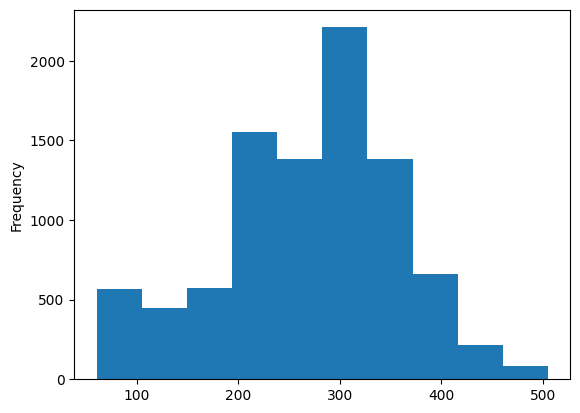

In [ ]:
food_df['Calories'].plot(kind='hist')

In [ ]:
food_df['Calories'].fillna(food_df['Calories'].median(),inplace=True)

<Axes: ylabel='Frequency'>

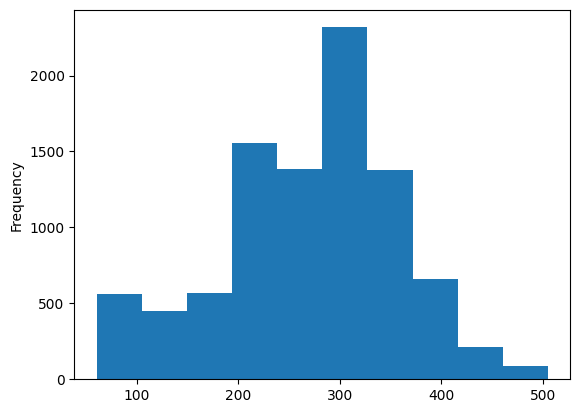

In [ ]:
food_df['Calories'].plot(kind='hist')

In [ ]:
food_df.isnull().sum()

,0
Calories,0
Protein,107
Fat,107
Carbs,108
Sugar,108
Fiber,108
Sodium,108
Cholesterol,108
Glycemic_Index,108
Water_Content,108


In [ ]:
food_df['Protein'].value_counts(dropna=False)

,count
Protein,
NaN,107
81.761772,42
0.000000,5
29.265662,1
1.683980,1
...,...
7.029820,1
8.058951,1
7.631245,1


<Axes: ylabel='Frequency'>

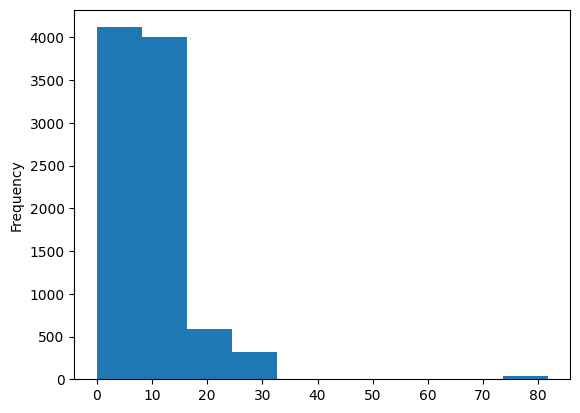

In [ ]:
food_df['Protein'].plot(kind='hist')

<Axes: >

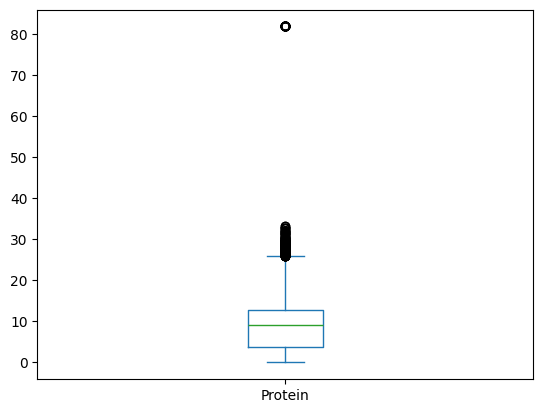

In [ ]:
food_df['Protein'].plot(kind='box')

In [ ]:
Q1=food_df['Protein'].quantile(0.25)
Q3=food_df['Protein'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Protein'] = food_df['Protein'].clip(lower=lower_bound,upper= upper_bound)
food_df['Protein'].fillna(food_df['Protein'].median(),inplace=True)

8.818762600342243


/tmp/ipython-input-3339506117.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Protein'].fillna(food_df['Protein'].median(),inplace=True)


<Axes: ylabel='Frequency'>

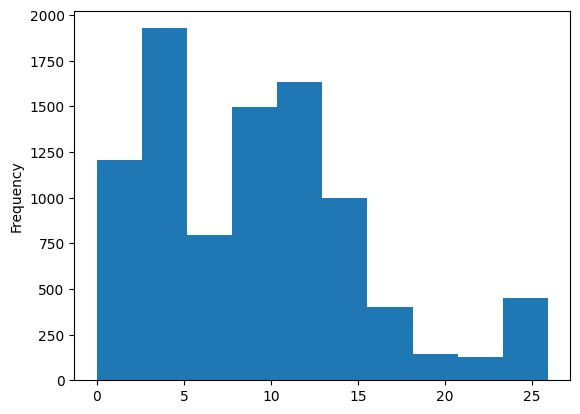

In [ ]:
food_df['Protein'].plot(kind='hist')

In [ ]:
food_df.isnull().sum()

,0
Calories,0
Protein,0
Fat,107
Carbs,108
Sugar,108
Fiber,108
Sodium,108
Cholesterol,108
Glycemic_Index,108
Water_Content,108


<Axes: ylabel='Frequency'>

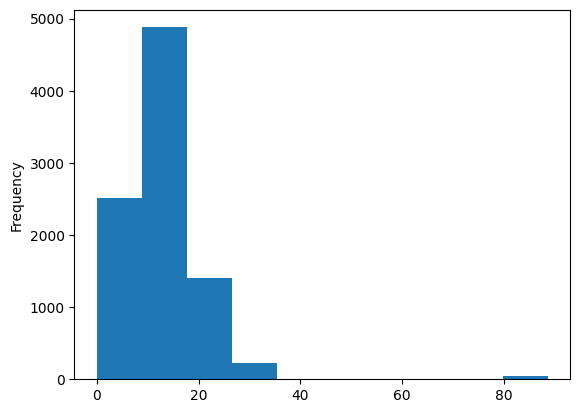

In [ ]:
food_df['Fat'].plot(kind='hist')

7.464398938369008


/tmp/ipython-input-2231477163.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Fat'].fillna(food_df['Fat'].median(),inplace=True)


<Axes: ylabel='Frequency'>

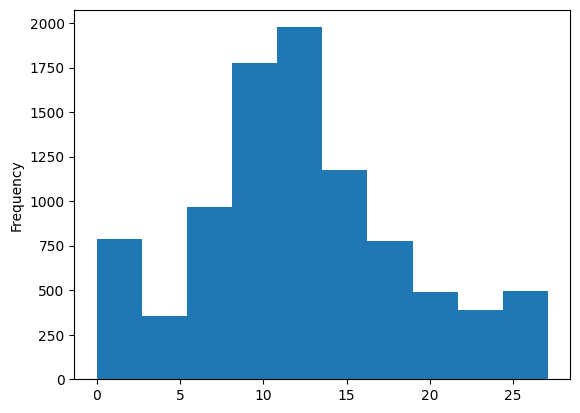

In [ ]:
Q1=food_df['Fat'].quantile(0.25)
Q3=food_df['Fat'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Fat'] = food_df['Fat'].clip(lower=lower_bound,upper= upper_bound)
food_df['Fat'].fillna(food_df['Fat'].median(),inplace=True)
food_df['Fat'].plot(kind='hist')

<Axes: ylabel='Frequency'>

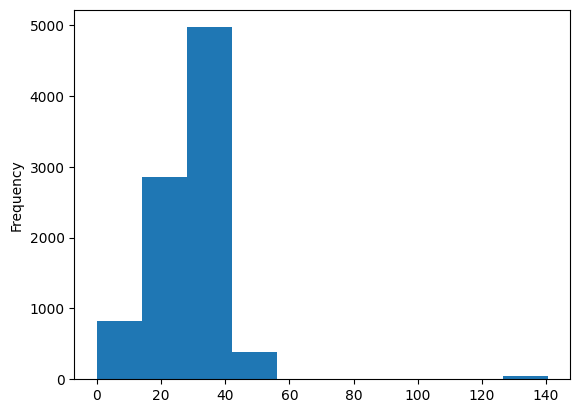

In [ ]:
food_df['Carbs'].plot(kind='hist')


9.498107406714261


/tmp/ipython-input-1143019236.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Carbs'].fillna(food_df['Carbs'].median(),inplace=True)


<Axes: ylabel='Frequency'>

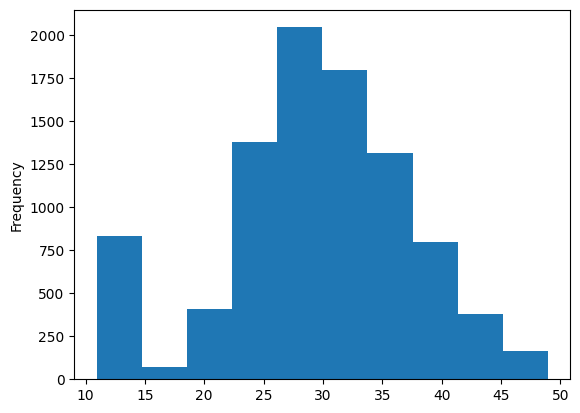

In [ ]:
Q1=food_df['Carbs'].quantile(0.25)
Q3=food_df['Carbs'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Carbs'] = food_df['Carbs'].clip(lower=lower_bound,upper= upper_bound)
food_df['Carbs'].fillna(food_df['Carbs'].median(),inplace=True)
food_df['Carbs'].plot(kind='hist')

<Axes: ylabel='Frequency'>

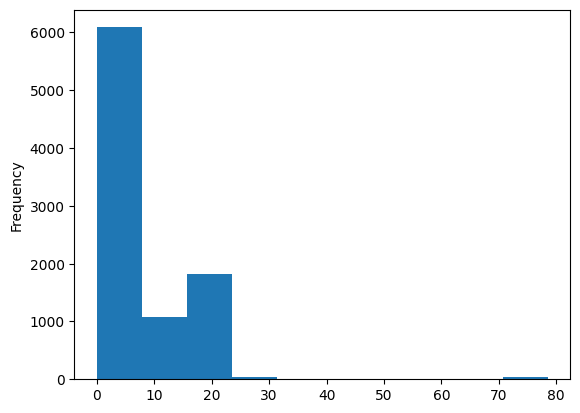

In [ ]:
food_df['Sugar'].plot(kind='hist')


10.690383021774874


/tmp/ipython-input-2446968196.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Sugar'].fillna(food_df['Sugar'].median(),inplace=True)


<Axes: ylabel='Frequency'>

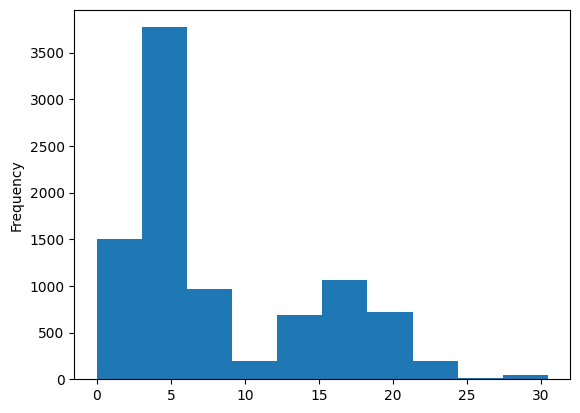

In [ ]:
Q1=food_df['Sugar'].quantile(0.25)
Q3=food_df['Sugar'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Sugar'] = food_df['Sugar'].clip(lower=lower_bound,upper= upper_bound)
food_df['Sugar'].fillna(food_df['Sugar'].median(),inplace=True)
food_df['Sugar'].plot(kind='hist')

<Axes: ylabel='Frequency'>

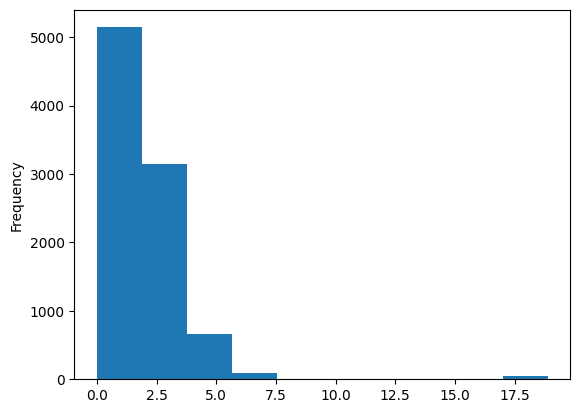

In [ ]:
food_df['Fiber'].plot(kind='hist')


1.8850886618432414


/tmp/ipython-input-801040306.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Fiber'].fillna(food_df['Fiber'].median(),inplace=True)


<Axes: ylabel='Frequency'>

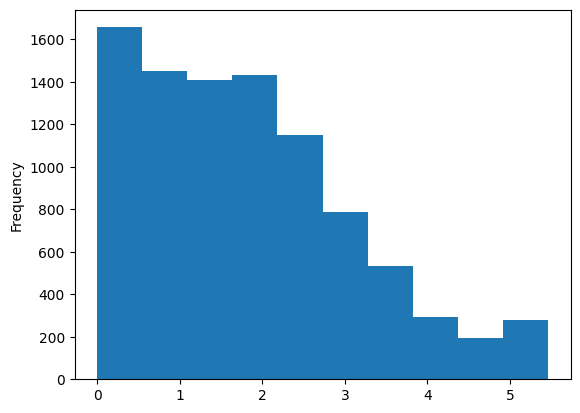

In [ ]:
Q1=food_df['Fiber'].quantile(0.25)
Q3=food_df['Fiber'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Fiber'] = food_df['Fiber'].clip(lower=lower_bound,upper= upper_bound)
food_df['Fiber'].fillna(food_df['Fiber'].median(),inplace=True)
food_df['Fiber'].plot(kind='hist')

<Axes: ylabel='Frequency'>

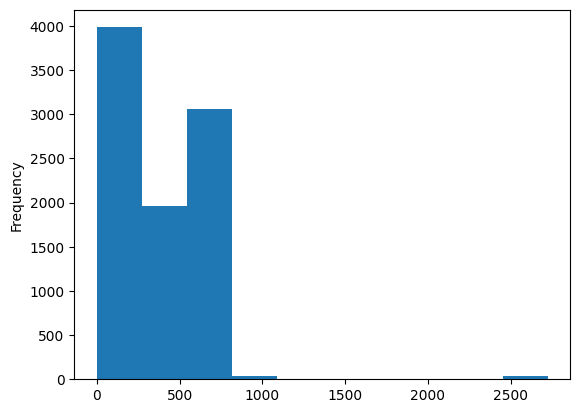

In [ ]:
food_df['Sodium'].plot(kind='hist')


568.3964899738492


/tmp/ipython-input-1746116468.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Sodium'].fillna(food_df['Sodium'].median(),inplace=True)


<Axes: ylabel='Frequency'>

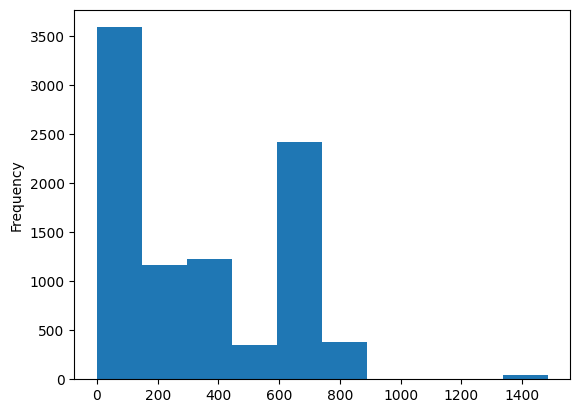

In [ ]:
Q1=food_df['Sodium'].quantile(0.25)
Q3=food_df['Sodium'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Sodium'] = food_df['Sodium'].clip(lower=lower_bound,upper= upper_bound)
food_df['Sodium'].fillna(food_df['Sodium'].median(),inplace=True)
food_df['Sodium'].plot(kind='hist')

<Axes: ylabel='Frequency'>

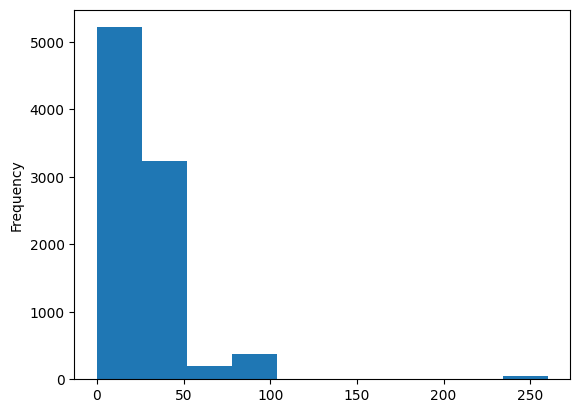

In [ ]:
food_df['Cholesterol'].plot(kind='hist')


22.489095022276608


/tmp/ipython-input-2409590140.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Cholesterol'].fillna(food_df['Cholesterol'].median(),inplace=True)


<Axes: ylabel='Frequency'>

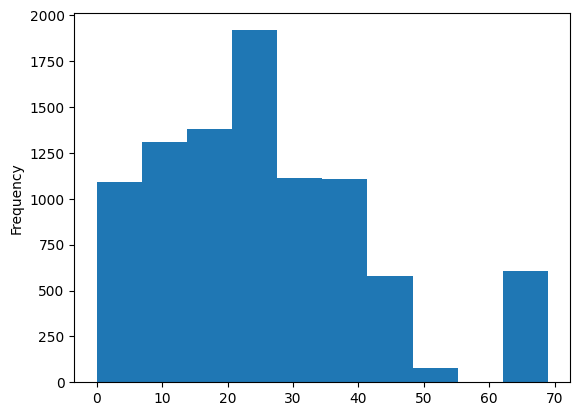

In [ ]:
Q1=food_df['Cholesterol'].quantile(0.25)
Q3=food_df['Cholesterol'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Cholesterol'] = food_df['Cholesterol'].clip(lower=lower_bound,upper= upper_bound)
food_df['Cholesterol'].fillna(food_df['Cholesterol'].median(),inplace=True)
food_df['Cholesterol'].plot(kind='hist')

<Axes: ylabel='Frequency'>

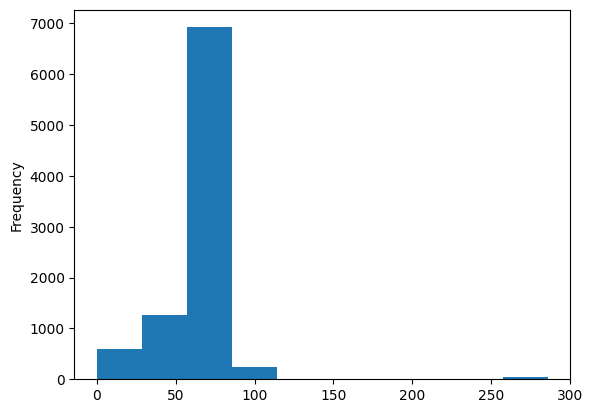

In [ ]:
food_df['Glycemic_Index'].plot(kind='hist')


15.43007717453105


/tmp/ipython-input-3123524672.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Glycemic_Index'].fillna(food_df['Glycemic_Index'].median(),inplace=True)


<Axes: ylabel='Frequency'>

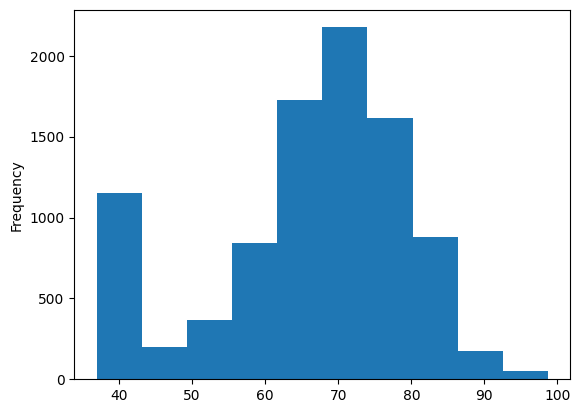

In [ ]:
Q1=food_df['Glycemic_Index'].quantile(0.25)
Q3=food_df['Glycemic_Index'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Glycemic_Index'] = food_df['Glycemic_Index'].clip(lower=lower_bound,upper= upper_bound)
food_df['Glycemic_Index'].fillna(food_df['Glycemic_Index'].median(),inplace=True)
food_df['Glycemic_Index'].plot(kind='hist')

<Axes: ylabel='Frequency'>

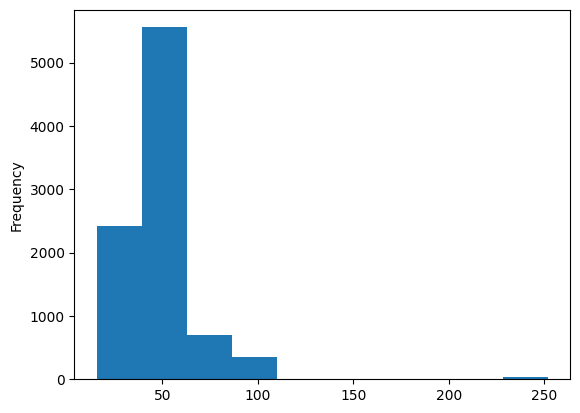

In [ ]:
food_df['Water_Content'].plot(kind='hist')


13.41232284543058


/tmp/ipython-input-3050908787.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Water_Content'].fillna(food_df['Water_Content'].median(),inplace=True)


<Axes: ylabel='Frequency'>

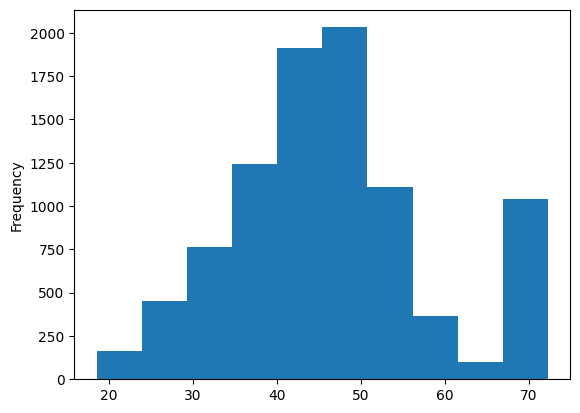

In [ ]:
Q1=food_df['Water_Content'].quantile(0.25)
Q3=food_df['Water_Content'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Water_Content'] = food_df['Water_Content'].clip(lower=lower_bound,upper= upper_bound)
food_df['Water_Content'].fillna(food_df['Water_Content'].median(),inplace=True)
food_df['Water_Content'].plot(kind='hist')

<Axes: ylabel='Frequency'>

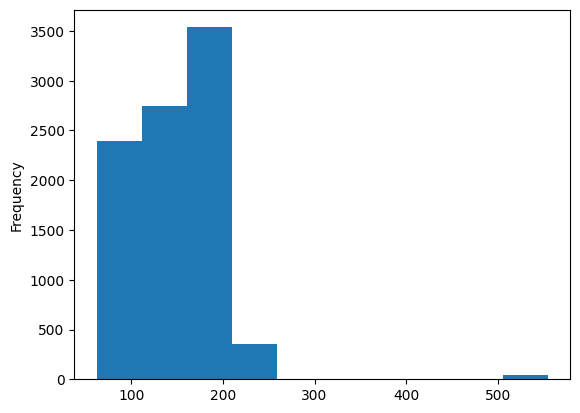

In [ ]:
food_df['Serving_Size'].plot(kind='hist')

80.85774552446931


/tmp/ipython-input-569616796.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_df['Serving_Size'].fillna(food_df['Serving_Size'].median(),inplace=True)


<Axes: ylabel='Frequency'>

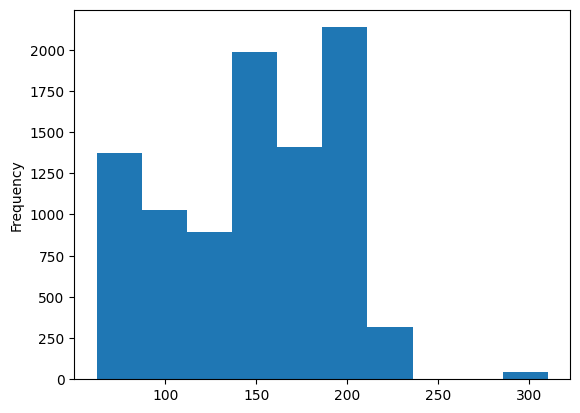

In [ ]:
Q1=food_df['Serving_Size'].quantile(0.25)
Q3=food_df['Serving_Size'].quantile(0.75)

Iqr = Q3-Q1
print(Iqr)

lower_bound= Q1-1.5*Iqr
upper_bound= Q3+1.5*Iqr

food_df['Serving_Size'] = food_df['Serving_Size'].clip(lower=lower_bound,upper= upper_bound)
food_df['Serving_Size'].fillna(food_df['Serving_Size'].median(),inplace=True)
food_df['Serving_Size'].plot(kind='hist')

In [ ]:
food_df.isnull().sum()

,0
Calories,0
Protein,0
Fat,0
Carbs,0
Sugar,0
Fiber,0
Sodium,0
Cholesterol,0
Glycemic_Index,0
Water_Content,0


In [ ]:
food_df.duplicated().sum()

np.int64(47)

In [ ]:
food_df.drop_duplicates(inplace=True)

In [ ]:
food_df.duplicated().sum()

np.int64(0)

In [ ]:
food_df['Food_Name'].unique()

array(['Pizza', 'Ice Cream', 'Burger', 'Sushi', 'Donut', 'Steak', 'Apple',
       'Banana', 'Pasta', 'Salad', nan], dtype=object)

In [ ]:
food_df['Calories'].skew()

np.float64(-0.2835940757543445)

In [ ]:
food_df.select_dtypes(include=['int64','float64']).skew()

,0
Calories,-0.283594
Protein,0.784925
Fat,0.263874
Carbs,-0.490156
Sugar,0.864669
Fiber,0.707869
Sodium,0.480488
Cholesterol,0.780671
Glycemic_Index,-0.757078
Water_Content,0.545177


In [ ]:
food_df.dropna(subset=['Food_Name'], inplace=True)
food_df.reset_index(drop=True, inplace=True)
X=food_df.drop('Food_Name',axis=1)
Y=food_df['Food_Name']

In [ ]:
X

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9178,178.865144,8.497347,8.457762,25.771561,4.613203,1.649837,303.914397,18.426571,68.846281,44.090713,128.791298,lunch,grilled,False,True
9179,325.848219,14.763603,25.490854,28.618117,6.060616,2.743457,681.347858,46.802118,62.876427,46.509836,193.174339,lunch,baked,False,False
9180,298.694890,17.099918,16.616228,36.038691,3.706309,2.560760,597.148023,23.686207,77.561511,45.357218,201.306064,breakfast,fried,False,False
9181,342.053223,7.627456,8.433386,36.321920,2.506955,2.467520,13.667479,13.259509,70.815814,52.425795,152.396335,dinner,fried,False,False


In [ ]:
Y

,Food_Name
0,Pizza
1,Ice Cream
2,Burger
3,Sushi
4,Donut
...,...
9178,Sushi
9179,Burger
9180,Pizza
9181,Pasta


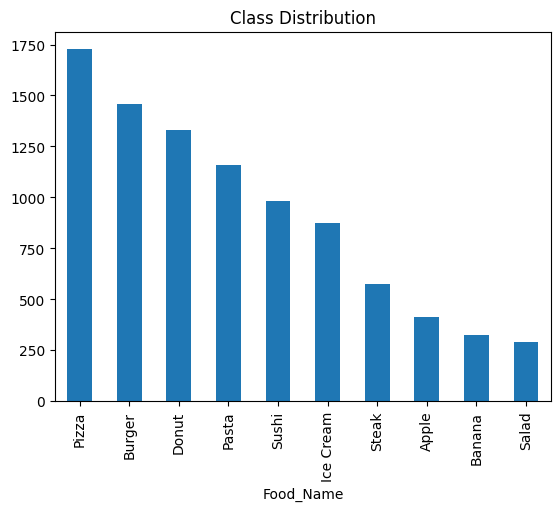

In [ ]:
food_df['Food_Name'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.show()

In [ ]:
num_cols=X.select_dtypes(include=['float64']).columns

In [ ]:
cat_cols=X.select_dtypes(include=['object']).columns

In [ ]:
bool_cols=X.select_dtypes(include=['bool']).columns

In [ ]:
X=pd.get_dummies(X,columns=['Meal_Type','Preparation_Method'],drop_first=True)

In [ ]:
X

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free,Meal_Type_dinner,Meal_Type_lunch,Meal_Type_snack,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,0.232114,0.832973,0.300335,0.722940,-0.533415,-0.401929,1.129881,-0.014914,1.130799,-0.071967,1.080329,0,0,True,False,False,True,False,False
1,-0.667606,-0.825715,-0.092603,-0.740829,1.244099,-1.284904,-0.929845,0.527955,0.261178,0.269089,-1.009301,0,1,False,False,True,False,False,True
2,0.697154,0.830810,1.168963,0.019773,-0.313828,-0.779836,1.185444,0.557991,-0.241696,-0.523111,1.111970,0,0,False,False,True,False,False,True
3,-0.835859,0.042747,-1.046714,0.337941,-0.817855,-0.083275,-0.103874,0.190349,0.201033,0.885883,-0.298598,0,1,False,True,False,True,False,False
4,0.047546,-0.499344,0.626884,0.053486,1.399193,-0.269426,-0.119650,-0.573862,0.323410,-1.090471,-1.696226,0,0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9130,-0.626582,-0.864691,-0.283088,-0.680401,1.419944,-1.024414,-0.161332,-0.656325,0.311143,-0.860906,-1.636513,0,0,True,False,False,False,False,True
9131,-1.057858,-0.111672,-0.583783,-0.430693,-0.566563,-0.129381,-0.092615,-0.397592,0.212391,-0.200590,-0.452927,0,1,False,True,False,False,True,False
9132,0.641125,0.901447,2.060584,-0.084842,-0.343226,0.702257,1.250105,1.256756,-0.218318,-0.003458,0.982338,0,0,False,True,False,False,False,False
9133,0.327259,1.279178,0.682809,0.816742,-0.706498,0.563325,0.950564,-0.090945,0.841172,-0.097384,1.163615,0,0,False,False,False,True,False,False


In [ ]:
bool_cols=['Is_Vegan','Is_Gluten_Free']
X[bool_cols]=X[bool_cols].fillna(False).astype(int)

In [ ]:
X

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free,Meal_Type_dinner,Meal_Type_lunch,Meal_Type_snack,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,0.232114,0.832973,0.300335,0.722940,-0.533415,-0.401929,1.129881,-0.014914,1.130799,-0.071967,1.080329,0,0,True,False,False,True,False,False
1,-0.667606,-0.825715,-0.092603,-0.740829,1.244099,-1.284904,-0.929845,0.527955,0.261178,0.269089,-1.009301,0,1,False,False,True,False,False,True
2,0.697154,0.830810,1.168963,0.019773,-0.313828,-0.779836,1.185444,0.557991,-0.241696,-0.523111,1.111970,0,0,False,False,True,False,False,True
3,-0.835859,0.042747,-1.046714,0.337941,-0.817855,-0.083275,-0.103874,0.190349,0.201033,0.885883,-0.298598,0,1,False,True,False,True,False,False
4,0.047546,-0.499344,0.626884,0.053486,1.399193,-0.269426,-0.119650,-0.573862,0.323410,-1.090471,-1.696226,0,0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9130,-0.626582,-0.864691,-0.283088,-0.680401,1.419944,-1.024414,-0.161332,-0.656325,0.311143,-0.860906,-1.636513,0,0,True,False,False,False,False,True
9131,-1.057858,-0.111672,-0.583783,-0.430693,-0.566563,-0.129381,-0.092615,-0.397592,0.212391,-0.200590,-0.452927,0,1,False,True,False,False,True,False
9132,0.641125,0.901447,2.060584,-0.084842,-0.343226,0.702257,1.250105,1.256756,-0.218318,-0.003458,0.982338,0,0,False,True,False,False,False,False
9133,0.327259,1.279178,0.682809,0.816742,-0.706498,0.563325,0.950564,-0.090945,0.841172,-0.097384,1.163615,0,0,False,False,False,True,False,False


In [ ]:
le=LabelEncoder()
Y_encoded=le.fit_transform(Y)

In [ ]:
Y_encoded

array([6, 4, 2, ..., 2, 6, 5])

In [ ]:
# Impute remaining missing values in 'Serving_Size' before any further processing.
X['Serving_Size'].fillna(X['Serving_Size'].median(),inplace=True)
X.isnull().sum()

/tmp/ipython-input-831446768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Serving_Size'].fillna(X['Serving_Size'].median(),inplace=True)


,0
Calories,0
Protein,0
Fat,0
Carbs,0
Sugar,0
Fiber,0
Sodium,0
Cholesterol,0
Glycemic_Index,0
Water_Content,0


In [ ]:
scaler=StandardScaler()
X[num_cols]=scaler.fit_transform(X[num_cols])

In [ ]:
X

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free,Meal_Type_dinner,Meal_Type_lunch,Meal_Type_snack,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,0.232114,0.832973,0.300335,0.722940,-0.533415,-0.401929,1.129881,-0.014914,1.130799,-0.071967,1.080329,0,0,True,False,False,True,False,False
1,-0.667606,-0.825715,-0.092603,-0.740829,1.244099,-1.284904,-0.929845,0.527955,0.261178,0.269089,-1.009301,0,1,False,False,True,False,False,True
2,0.697154,0.830810,1.168963,0.019773,-0.313828,-0.779836,1.185444,0.557991,-0.241696,-0.523111,1.111970,0,0,False,False,True,False,False,True
3,-0.835859,0.042747,-1.046714,0.337941,-0.817855,-0.083275,-0.103874,0.190349,0.201033,0.885883,-0.298598,0,1,False,True,False,True,False,False
4,0.047546,-0.499344,0.626884,0.053486,1.399193,-0.269426,-0.119650,-0.573862,0.323410,-1.090471,-1.696226,0,0,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9130,-0.626582,-0.864691,-0.283088,-0.680401,1.419944,-1.024414,-0.161332,-0.656325,0.311143,-0.860906,-1.636513,0,0,True,False,False,False,False,True
9131,-1.057858,-0.111672,-0.583783,-0.430693,-0.566563,-0.129381,-0.092615,-0.397592,0.212391,-0.200590,-0.452927,0,1,False,True,False,False,True,False
9132,0.641125,0.901447,2.060584,-0.084842,-0.343226,0.702257,1.250105,1.256756,-0.218318,-0.003458,0.982338,0,0,False,True,False,False,False,False
9133,0.327259,1.279178,0.682809,0.816742,-0.706498,0.563325,0.950564,-0.090945,0.841172,-0.097384,1.163615,0,0,False,False,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier






In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(
    X,Y_encoded,test_size=0.2,random_state=42
)

In [ ]:
def evaluate_model(Y_test,Y_pred):
  print("Accuracy: ",accuracy_score(Y_test,Y_pred))
  print("\nClassification Report:\n")
  print( classification_report(Y_test, Y_pred))
  print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))



  #print("Precision : ",precision_score(Y_test,Y_pred,average='weighted'))
  #print("Recall : ",recall_score(Y_test,Y_pred,average='weighted'))
  #print("F1_Score : ",f1_score(Y_test,Y_pred,average='weighted'))
  #print("Confusion_matrix : ",confusion_matrix(Y_test,Y_pred))



In [ ]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Accuracy:  0.9890530925013684

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.96      0.96      0.96        56
           2       0.97      0.99      0.98       289
           3       1.00      0.99      0.99       264
           4       1.00      1.00      1.00       186
           5       1.00      0.98      0.99       237
           6       0.99      0.98      0.99       364
           7       1.00      1.00      1.00        75
           8       1.00      0.99      1.00       110
           9       0.99      1.00      1.00       173

    accuracy                           0.99      1827
   macro avg       0.99      0.99      0.99      1827
weighted avg       0.99      0.99      0.99      1827

Confusion Matrix:
 [[ 71   2   0   0   0   0   0   0   0   0]
 [  2  54   0   0   0   0   0   0   0   0]
 [  0   0 287   0   0   0   2   0   0   0]
 [  0   0   1 261   0   0   2   0   0 

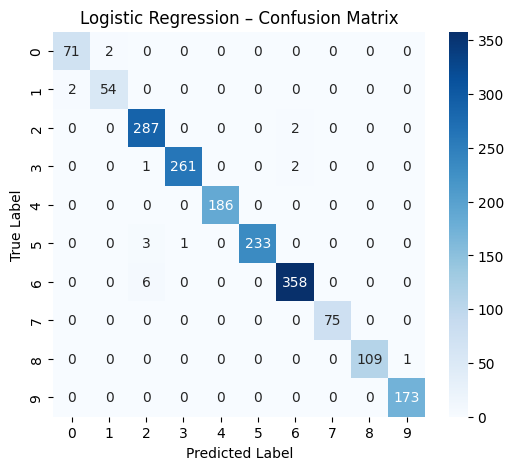

In [ ]:
Y_pred_lr=lr.predict(X_test)
evaluate_model(Y_test,Y_pred_lr)

cm_lr=confusion_matrix(Y_test,Y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression – Confusion Matrix")
plt.show()

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

Y_pred_dt=dt.predict(X_test)
evaluate_model(Y_test,Y_pred_dt)

Accuracy:  0.9792008757525998

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.95      1.00      0.97        56
           2       0.93      0.97      0.95       289
           3       0.99      0.98      0.99       264
           4       1.00      1.00      1.00       186
           5       1.00      0.98      0.99       237
           6       0.97      0.96      0.97       364
           7       1.00      1.00      1.00        75
           8       0.99      1.00      1.00       110
           9       1.00      0.99      0.99       173

    accuracy                           0.98      1827
   macro avg       0.98      0.98      0.98      1827
weighted avg       0.98      0.98      0.98      1827

Confusion Matrix:
 [[ 70   3   0   0   0   0   0   0   0   0]
 [  0  56   0   0   0   0   0   0   0   0]
 [  0   0 280   1   0   0   8   0   0   0]
 [  0   0   3 260   0   0   1   0   0 

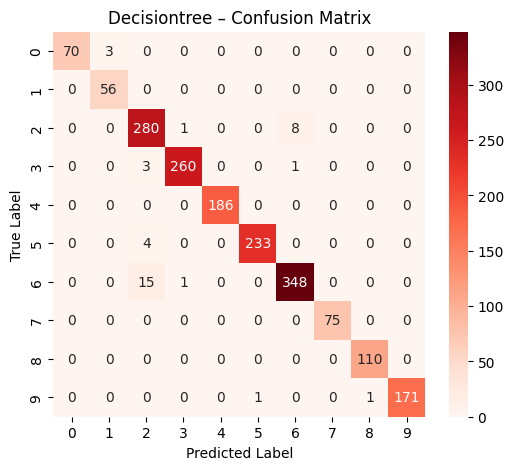

In [ ]:
cm_dt=confusion_matrix(Y_test,Y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decisiontree – Confusion Matrix")
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

Y_pred_rf=rf.predict(X_test)
evaluate_model(Y_test,Y_pred_rf)

Accuracy:  0.9901477832512315

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.98      1.00      0.99        56
           2       0.99      0.99      0.99       289
           3       0.99      0.99      0.99       264
           4       1.00      1.00      1.00       186
           5       0.99      0.98      0.99       237
           6       0.98      0.98      0.98       364
           7       1.00      1.00      1.00        75
           8       0.99      1.00      1.00       110
           9       1.00      0.99      1.00       173

    accuracy                           0.99      1827
   macro avg       0.99      0.99      0.99      1827
weighted avg       0.99      0.99      0.99      1827

Confusion Matrix:
 [[ 72   1   0   0   0   0   0   0   0   0]
 [  0  56   0   0   0   0   0   0   0   0]
 [  0   0 286   0   0   1   2   0   0   0]
 [  0   0   0 261   0   0   3   0   0 

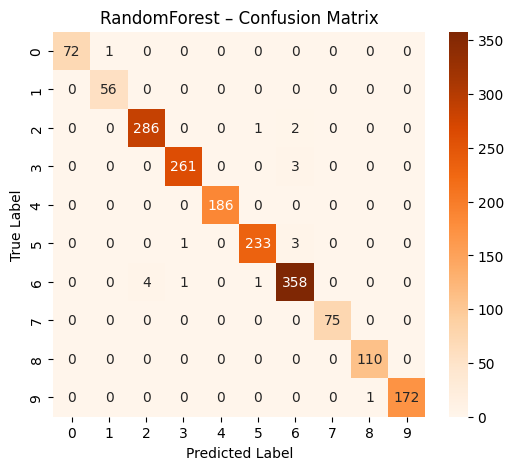

In [ ]:
cm_rf=confusion_matrix(Y_test,Y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RandomForest – Confusion Matrix")
plt.show()

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

Y_pred_knn=knn.predict(X_test)
evaluate_model(Y_test,Y_pred_knn)

Accuracy:  0.986863711001642

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.98      0.96      0.97        56
           2       0.97      0.98      0.97       289
           3       1.00      0.99      0.99       264
           4       1.00      1.00      1.00       186
           5       1.00      0.98      0.99       237
           6       0.98      0.98      0.98       364
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00       110
           9       1.00      0.99      1.00       173

    accuracy                           0.99      1827
   macro avg       0.99      0.99      0.99      1827
weighted avg       0.99      0.99      0.99      1827

Confusion Matrix:
 [[ 72   1   0   0   0   0   0   0   0   0]
 [  2  54   0   0   0   0   0   0   0   0]
 [  0   0 282   0   0   0   7   0   0   0]
 [  0   0   2 261   0   0   1   0   0  

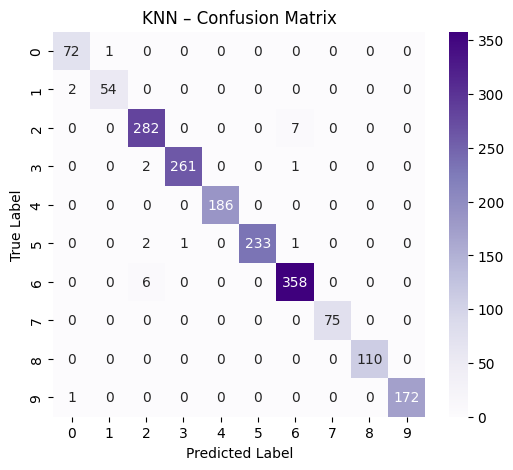

In [ ]:
cm_knn=confusion_matrix(Y_test,Y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN – Confusion Matrix")
plt.show()

In [ ]:
svm = SVC()
svm.fit(X_train, Y_train)

Y_pred_svm=svm.predict(X_test)
evaluate_model(Y_test,Y_pred_svm)

Accuracy:  0.9923371647509579

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.98      1.00      0.99        56
           2       0.99      0.99      0.99       289
           3       1.00      0.99      0.99       264
           4       1.00      1.00      1.00       186
           5       1.00      0.98      0.99       237
           6       0.98      0.99      0.99       364
           7       1.00      1.00      1.00        75
           8       1.00      0.99      1.00       110
           9       0.99      1.00      0.99       173

    accuracy                           0.99      1827
   macro avg       0.99      0.99      0.99      1827
weighted avg       0.99      0.99      0.99      1827

Confusion Matrix:
 [[ 71   1   0   0   0   0   0   0   0   1]
 [  0  56   0   0   0   0   0   0   0   0]
 [  0   0 287   0   0   0   2   0   0   0]
 [  0   0   0 261   0   0   3   0   0 

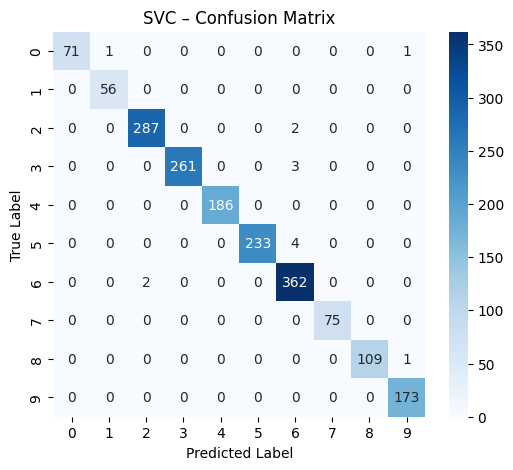

In [ ]:
cm_svm=confusion_matrix(Y_test,Y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVC – Confusion Matrix")
plt.show()

In [ ]:
xgb_mod = XGBClassifier(eval_metric='mlogloss')
xgb_mod.fit(X_train, Y_train)

Y_pred_xgb_mod=xgb_mod.predict(X_test)
evaluate_model(Y_test,Y_pred_xgb_mod)

Accuracy:  0.9912424740010947

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.98      1.00      0.99        56
           2       0.97      0.99      0.98       289
           3       0.99      0.99      0.99       264
           4       0.99      1.00      1.00       186
           5       1.00      0.98      0.99       237
           6       0.99      0.99      0.99       364
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00       110
           9       1.00      0.99      1.00       173

    accuracy                           0.99      1827
   macro avg       0.99      0.99      0.99      1827
weighted avg       0.99      0.99      0.99      1827

Confusion Matrix:
 [[ 72   1   0   0   0   0   0   0   0   0]
 [  0  56   0   0   0   0   0   0   0   0]
 [  0   0 287   1   0   0   1   0   0   0]
 [  0   0   2 261   0   0   1   0   0 

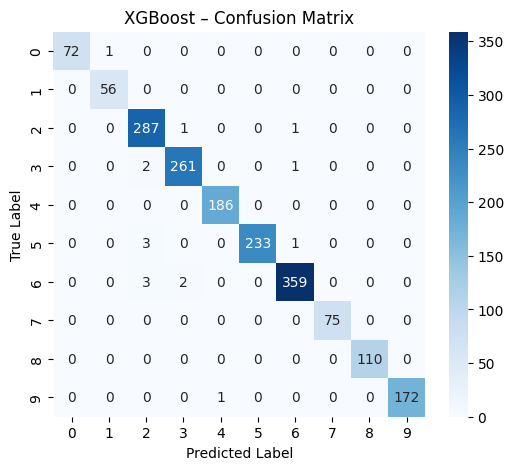

In [ ]:
cm_xgb_mod=confusion_matrix(Y_test,Y_pred_xgb_mod)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb_mod, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost – Confusion Matrix")
plt.show()

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)

Y_pred_gb=gb.predict(X_test)
evaluate_model(Y_test,Y_pred_gb)

Accuracy:  0.9912424740010947

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        56
           2       0.98      0.99      0.98       289
           3       0.99      0.99      0.99       264
           4       1.00      1.00      1.00       186
           5       0.99      0.98      0.99       237
           6       0.99      0.98      0.99       364
           7       1.00      1.00      1.00        75
           8       0.99      1.00      1.00       110
           9       1.00      0.99      1.00       173

    accuracy                           0.99      1827
   macro avg       0.99      0.99      0.99      1827
weighted avg       0.99      0.99      0.99      1827

Confusion Matrix:
 [[ 73   0   0   0   0   0   0   0   0   0]
 [  0  56   0   0   0   0   0   0   0   0]
 [  0   0 287   0   0   1   1   0   0   0]
 [  0   0   2 261   0   0   1   0   0 

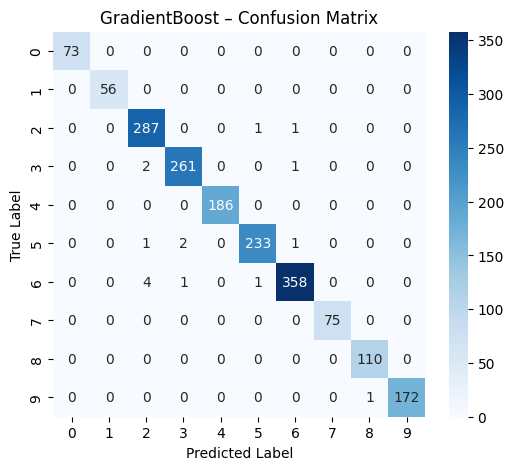

In [ ]:
cm_gb=confusion_matrix(Y_test,Y_pred_gb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GradientBoost – Confusion Matrix")
plt.show()

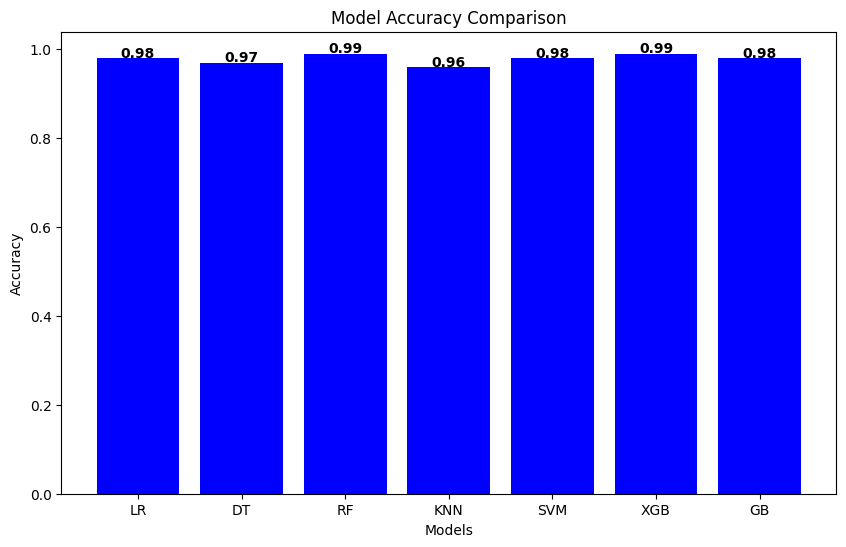

In [ ]:
models = ['LR', 'DT', 'RF', 'KNN', 'SVM', 'XGB', 'GB']
accuracy = [0.98, 0.97, 0.99, 0.96, 0.98, 0.99, 0.98]

plt.figure(figsize=(10,6))
bars = plt.bar(models, accuracy, color=['blue'])

for i, value in enumerate(accuracy):
    plt.text(i, value + 0.002, f"{value:.2f}", ha='center', fontweight='bold')

plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")



plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(rf, X, Y_encoded, cv=5, scoring='accuracy')

print("Random Forest CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Random Forest CV Accuracy: [0.98248495 0.98522167 0.98522167 0.99014778 0.99014778]
Mean CV Accuracy: 0.9866447728516693


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)

cv_scores = cross_val_score(lr, X, Y_encoded, cv=5, scoring='accuracy')

print("CV Accuracy scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

CV Accuracy scores: [0.98248495 0.99014778 0.98357964 0.99124247 0.99014778]
Mean CV Accuracy: 0.9875205254515599


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y_encoded, test_size=0.2, random_state=42, stratify=Y_encoded
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # FIT ONLY ON TRAIN
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [ ]:
Y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Test prediction and accuracy
Y_pred_test = rf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_test)
print("Test Accuracy of Random Forest:", accuracy)


# Feature names
feature_names = X.columns
print("Enter values in this order:\n", list(feature_names))


# Take user input
user_input = input("\nEnter values separated by commas: ")
values = list(map(float, user_input.split(",")))


# Create DataFrame for new sample
new_sample_df = pd.DataFrame([values], columns=feature_names)


# No scaling needed for Random Forest
prediction = rf.predict(new_sample_df)
predicted_food = le.inverse_transform(prediction)

print("Live Prediction Output:", predicted_food[0])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test Accuracy of Random Forest: 0.9901477832512315
Enter values in this order:
 ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Is_Vegan', 'Is_Gluten_Free', 'Meal_Type_dinner', 'Meal_Type_lunch', 'Meal_Type_snack', 'Preparation_Method_fried', 'Preparation_Method_grilled', 'Preparation_Method_raw']

Enter values separated by commas: 250,12,8,30,5,4,200,20,15,10,8,1,0,0,0,1,0,0,1
Live Prediction Output: Donut


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
250,12,8,30,5,4,200,20,15,10,8,1,0,0,0,1,0,0,1

In [ ]:

# Show feature names to user
feature_names = X.columns
print("Enter values in this order:\n", list(feature_names))

user_input = input("\nEnter values separated by commas: ")
values = list(map(float, user_input.split(",")))

# Convert to DataFrame with SAME columns
new_sample_df = pd.DataFrame([values], columns=feature_names)

# Scale
new_sample_scaled = scaler.transform(new_sample_df)

# Predict
prediction = gb.predict(new_sample_scaled)
predicted_food = le.inverse_transform(prediction)

print("Live Prediction Output:", predicted_food[0])

Enter values in this order:
 ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Is_Vegan', 'Is_Gluten_Free', 'Meal_Type_dinner', 'Meal_Type_lunch', 'Meal_Type_snack', 'Preparation_Method_fried', 'Preparation_Method_grilled', 'Preparation_Method_raw']


KeyboardInterrupt: Interrupted by user